# Clustering with K-Means

1. Overview
1. Demo
1. Implementation
1. How to choose a $k$

![](kmeans.svg)

[Animation](https://stats-demos.zach.wiki/static/kmeans_clustering.mp4)

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import kmeans_lesson_util
plt.ion()

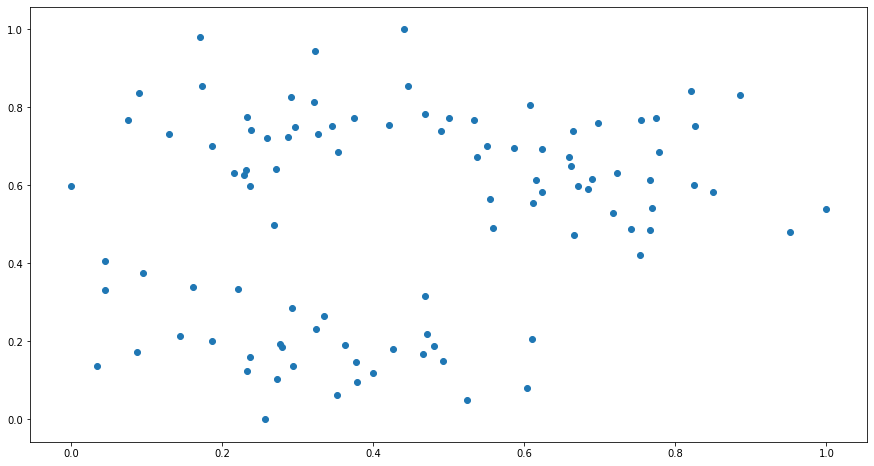

In [3]:
kmeans_lesson_util.viz_initial()

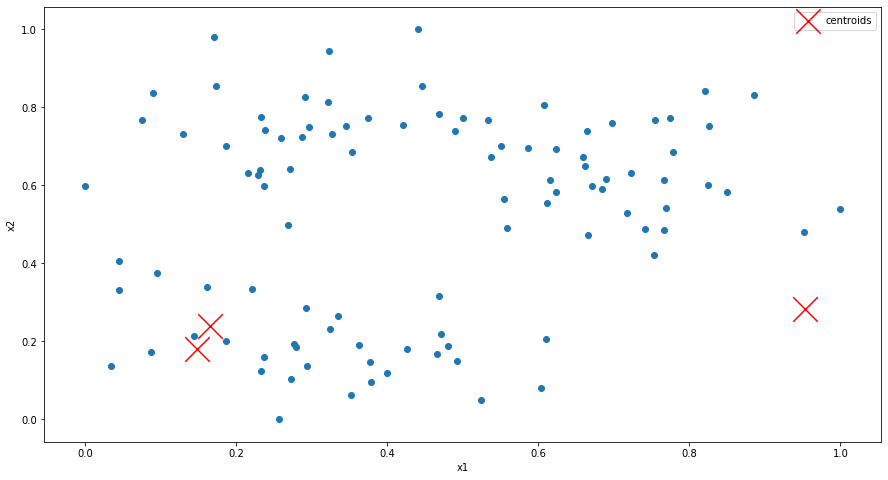

In [4]:
kmeans_lesson_util.viz_initial(True)

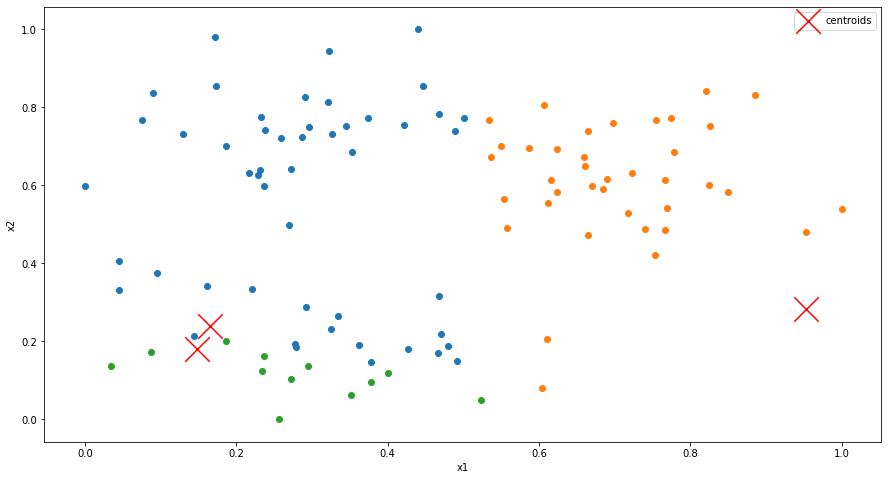

In [5]:
kmeans_lesson_util.assign_clusters()
kmeans_lesson_util.viz()

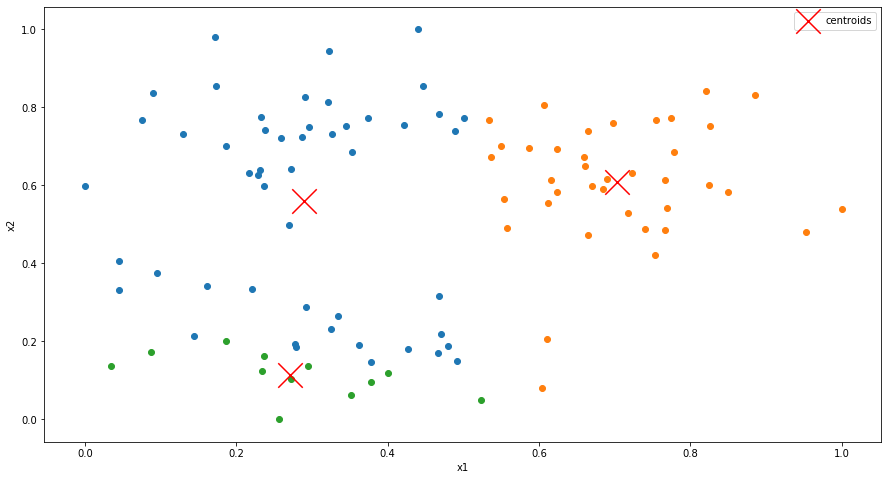

In [6]:
kmeans_lesson_util.update_centroids()
kmeans_lesson_util.viz()

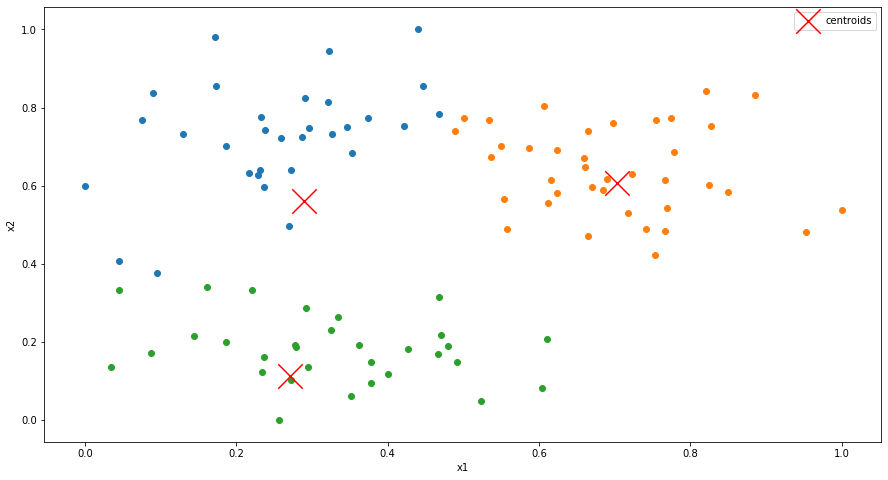

In [7]:
kmeans_lesson_util.assign_clusters()
kmeans_lesson_util.viz()

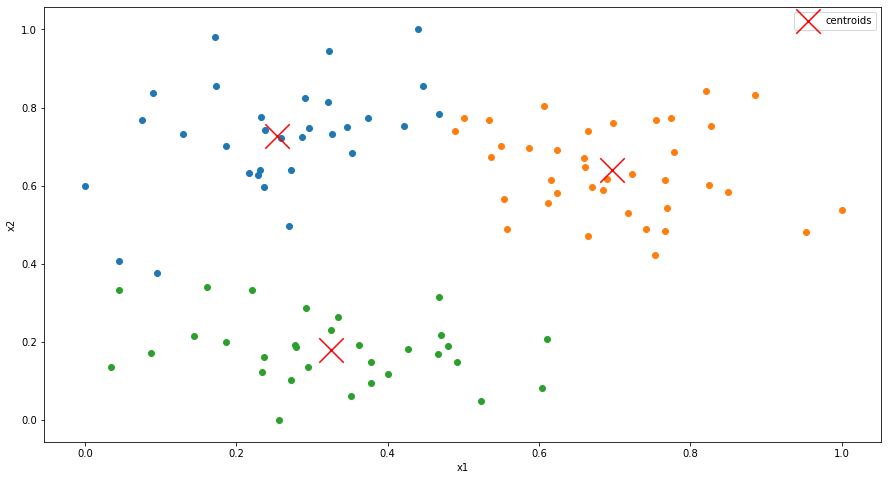

In [8]:
kmeans_lesson_util.update_centroids()
kmeans_lesson_util.viz()

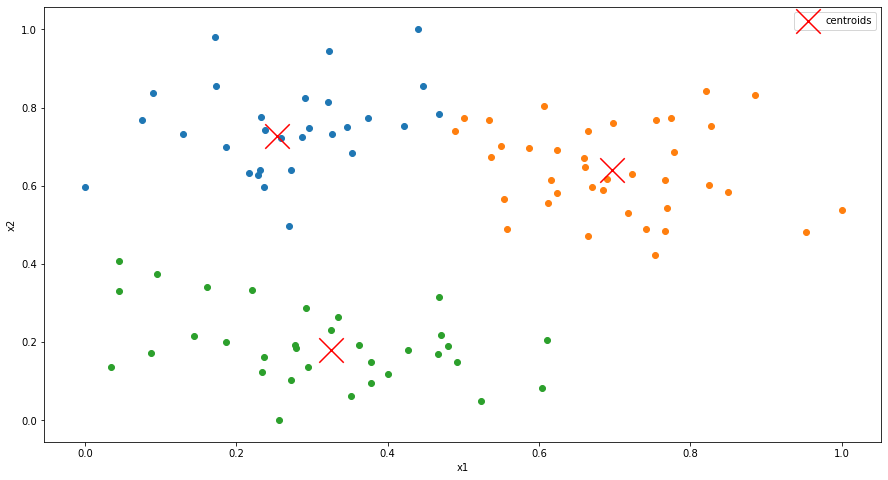

In [9]:
kmeans_lesson_util.assign_clusters()
kmeans_lesson_util.viz()

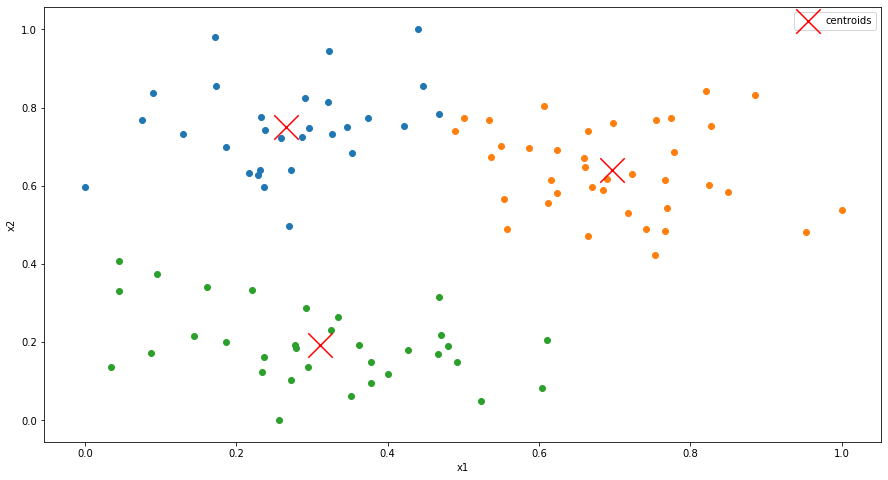

In [10]:
kmeans_lesson_util.update_centroids()
kmeans_lesson_util.viz()

## Implementation

In [14]:
from seaborn import load_dataset
from sklearn.cluster import KMeans

iris = load_dataset('iris')

In [15]:
X = iris[['petal_length', 'sepal_length']]

In [19]:
kmeans = KMeans(3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [23]:
iris['cluster'] = kmeans.predict(X)
iris.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


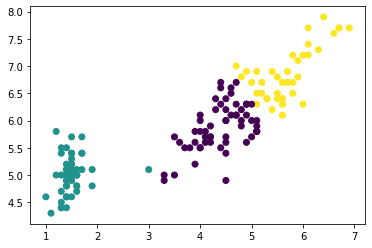

In [25]:
plt.scatter(iris.petal_length, iris.sepal_length, c=iris.cluster)

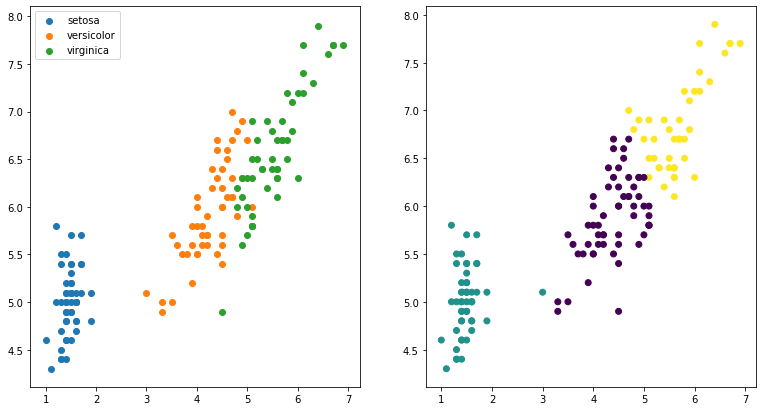

In [33]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species'):
    plt.scatter(subset.petal_length, subset.sepal_length, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.petal_length, iris.sepal_length, c=iris.cluster)

### Aside: seaborn plotting gotcha

If you have a string column, but all of the strings "look like" numbers, seaborn gets a little wonky.

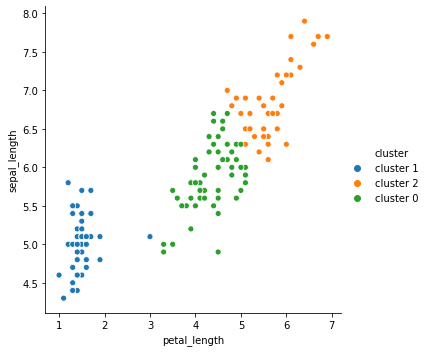

In [36]:
iris.cluster = 'cluster ' + iris.cluster.astype(str)
sns.relplot(data=iris, x='petal_length', y='sepal_length', hue='cluster')

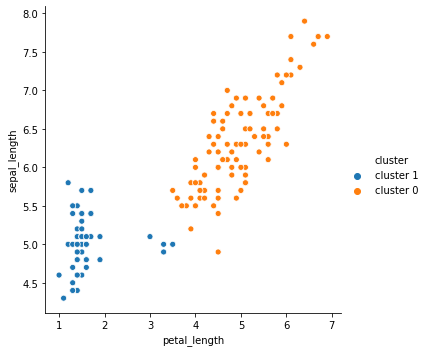

In [37]:
k = 2
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

sns.relplot(data=iris, y='sepal_length', x='petal_length', hue='cluster')

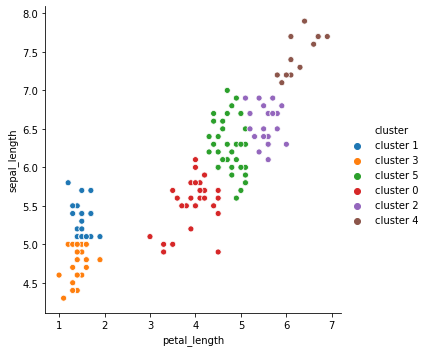

In [38]:
k = 6
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

sns.relplot(data=iris, y='sepal_length', x='petal_length', hue='cluster')

## Cluster Centers

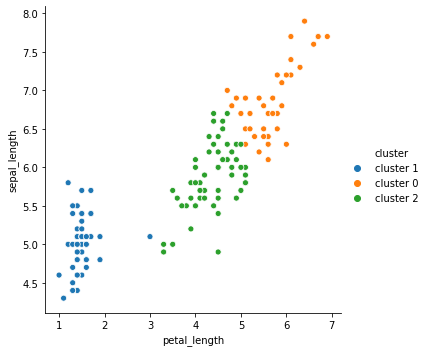

In [39]:
k = 3
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

sns.relplot(data=iris, y='sepal_length', x='petal_length', hue='cluster')

In [43]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_length,sepal_length
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [44]:
iris.groupby('cluster')['petal_length', 'sepal_length'].mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,petal_length,sepal_length
cluster,,
cluster 0,5.678049,6.839024
cluster 1,1.492157,5.007843
cluster 2,4.393103,5.874138


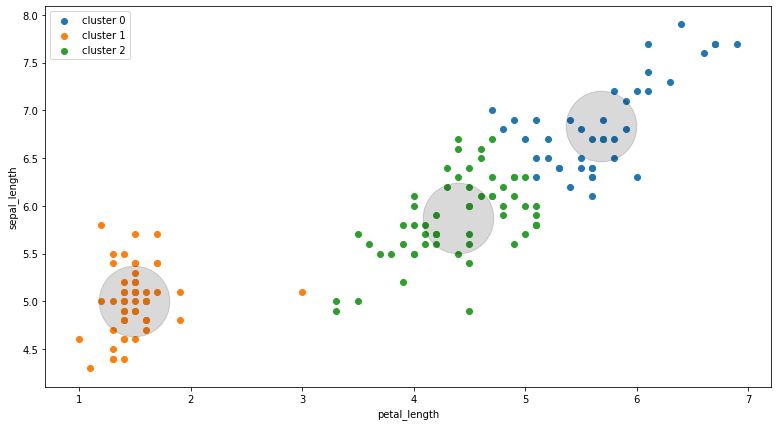

In [53]:
plt.figure(figsize=(13, 7))
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_length, subset.sepal_length, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# Xs to indicate cluster centers
# centroids.plot.scatter(y='sepal_length', x='petal_length', ax=plt.gca(), marker='x', s=1000, c='black')
centroids.plot.scatter(y='sepal_length', x='petal_length', ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

## Inertia

**def**: sum of squared distances from each point to it's cluster center

In [55]:
k = 3
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

kmeans.inertia_

53.809978644106934

In [56]:
k = 2
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

kmeans.inertia_

112.99207175925928

In [57]:
k = 4
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

kmeans.inertia_

34.317020779220776

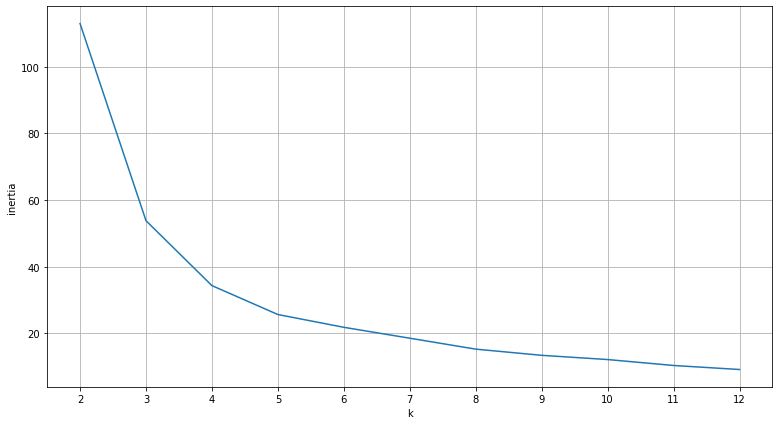

In [62]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

The elbow method: identify the "elbow", or where the "bend" is, of the above visual.

Where does an increase in k not give us much reduction in inertia?

Takeaway: increasing k past 4 or 5 doesn't give us that much reduction in inertia, so we'll choose a k around 4 or 5.

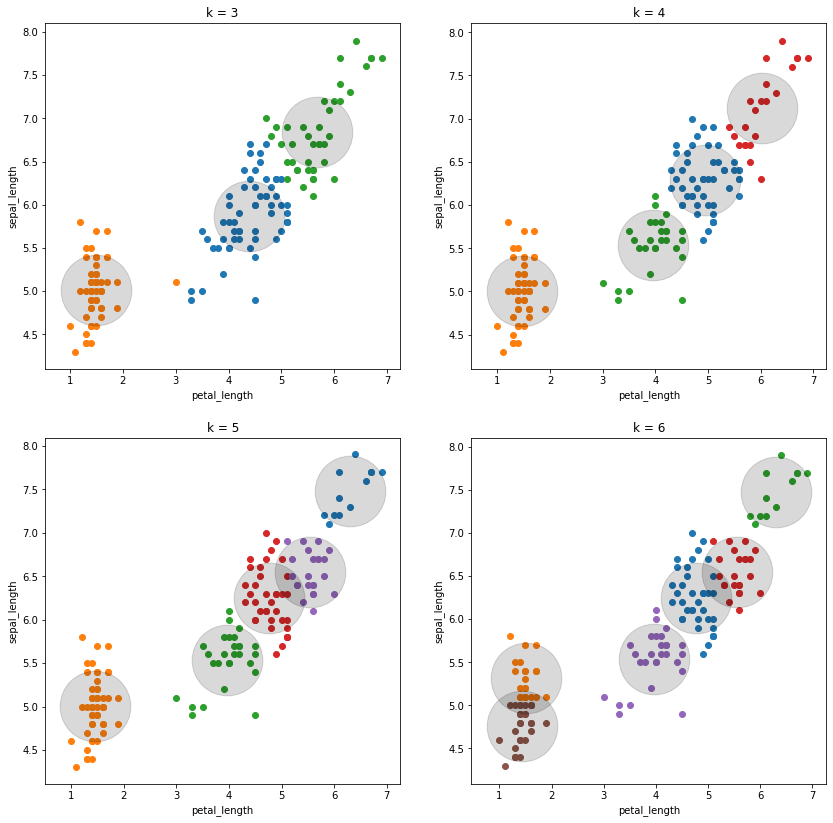

In [66]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.petal_length, subset.sepal_length, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y='sepal_length', x='petal_length', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

Primary uses for clusters:

- analysis / exploration
- modeling

primarily, clusters for exploration:

- what do these groups tell us about the features that were used to create the groups? (e.g. pageviews vs dollars spent)
- What do these groups tell us about features that **weren't** used to make the clusters? (e.g. logerror vs clusters made on lat and long)